# Reminder on descriptiv statistics
Comparison between the histogram and boxplot

## Histogram

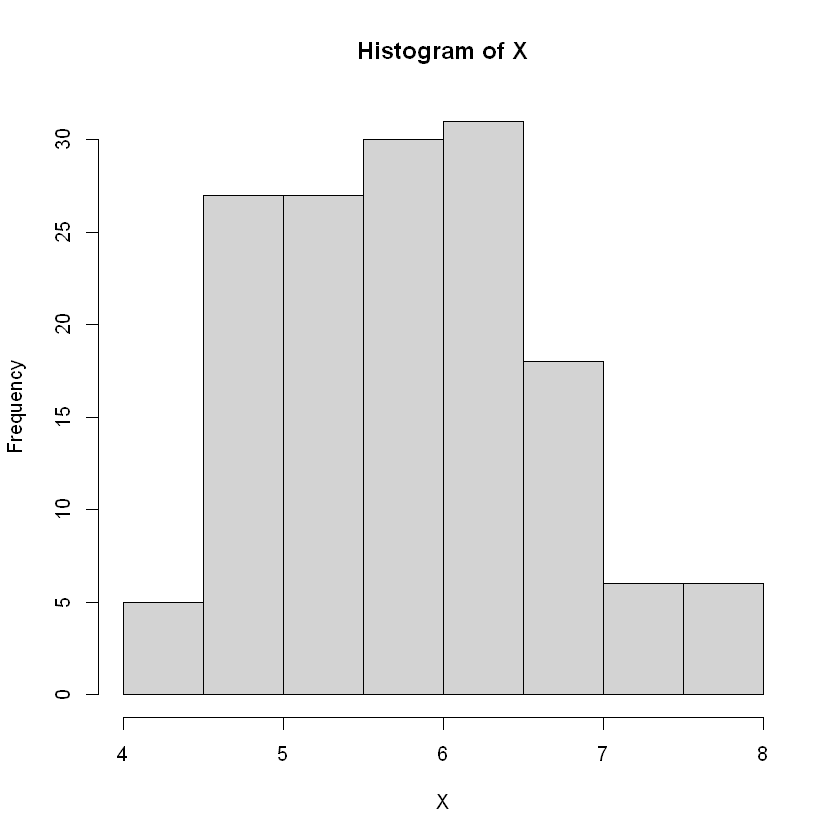

In [35]:
data(iris)
X = iris$Sepal.Length
hist(X)

It's the default version of R. Possible to change the story by tuning the histogram.

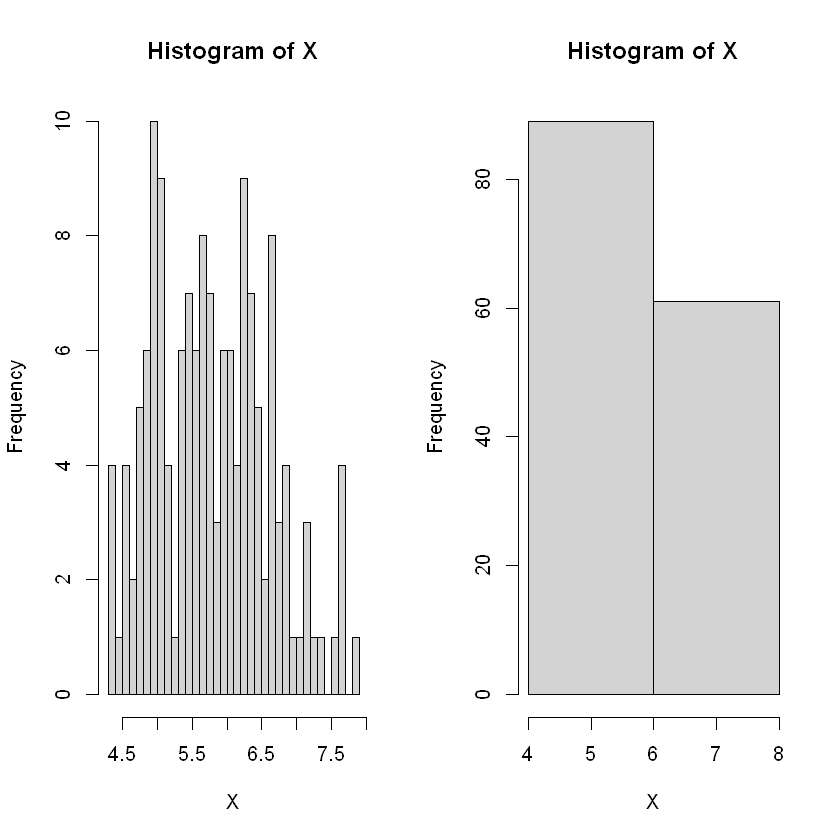

In [36]:
par(mfrow=c(1,2))
hist(X, breaks=50,freq = TRUE)
hist(X, breaks = 2)

It's possible to define specific function to calculate the best numbers of bins (by default "Strudge" function)

## Boxplot

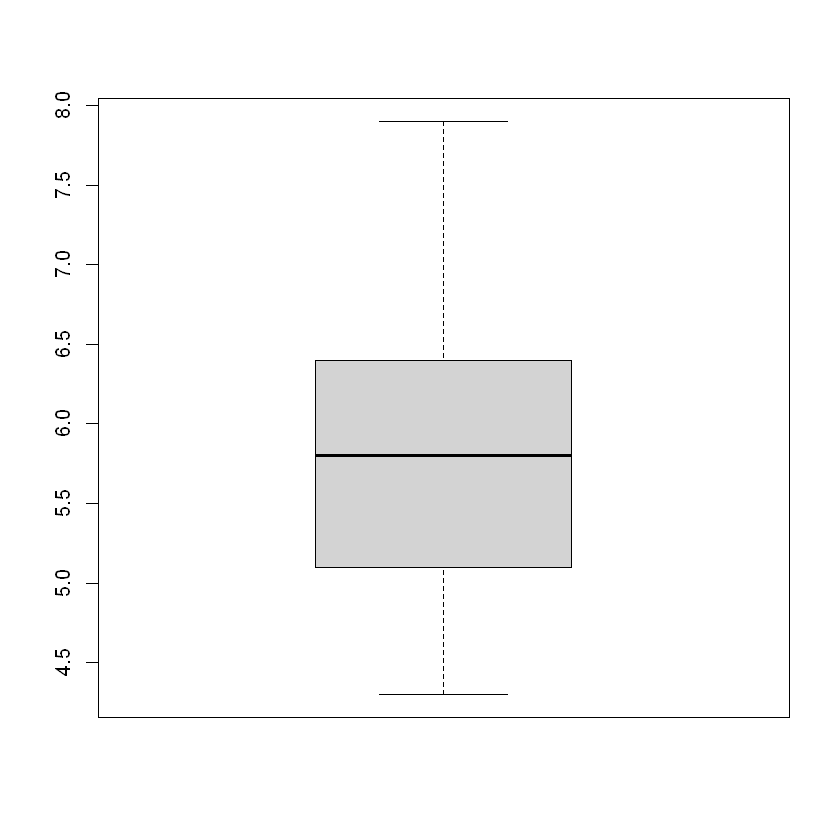

In [37]:
boxplot(X)

## Histogram + Boxplot

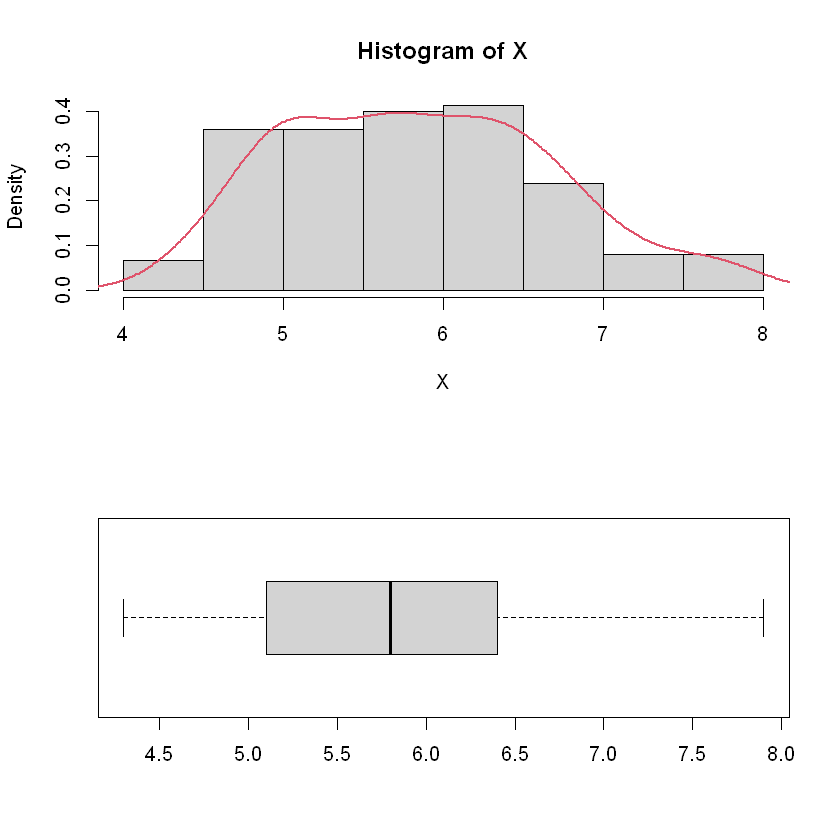

In [38]:
par(mfrow=c(2,1))
hist(X, freq=FALSE)
lines(density(X),lwd=2,col=2)
boxplot(X,horizontal = TRUE)

## Scatter and Pair plot

### Scatter plot

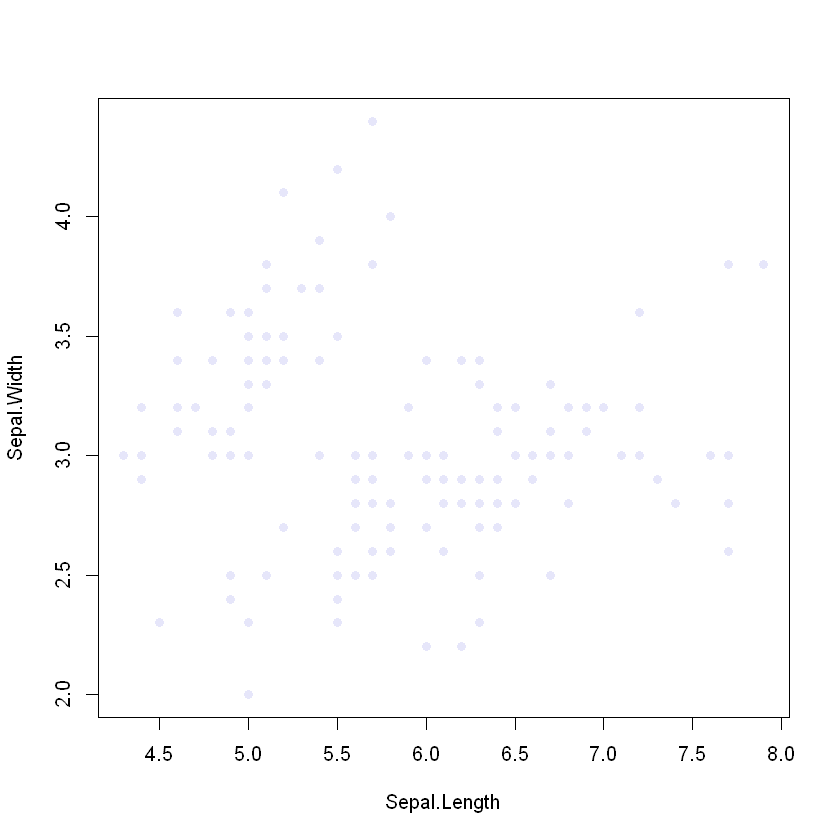

In [39]:
TwoVar = iris[,1:2]
plot(TwoVar,type='p',col='lavender',pch=19)

**Add a categorical variable on colour and pattern**

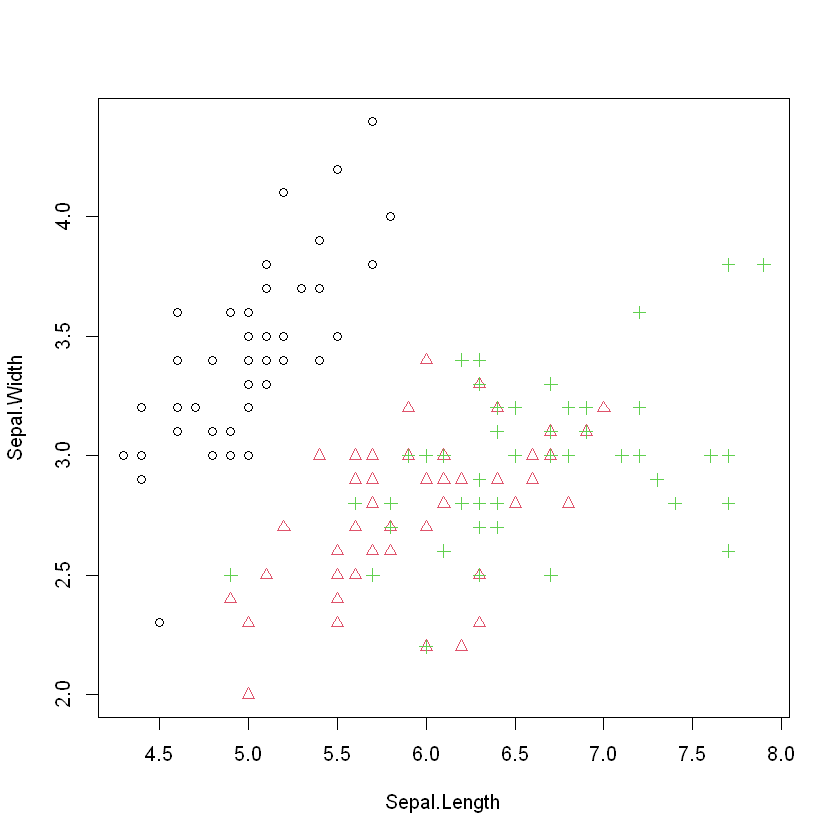

In [40]:
cls = as.numeric(iris$Species)
plot(TwoVar,type='p',col=cls,pch=cls)

**Here we can UNDERSTAND the datas**

## Multivariate data
Iris : 4 continuous variable which are all measured in centimeters => boxplot possible

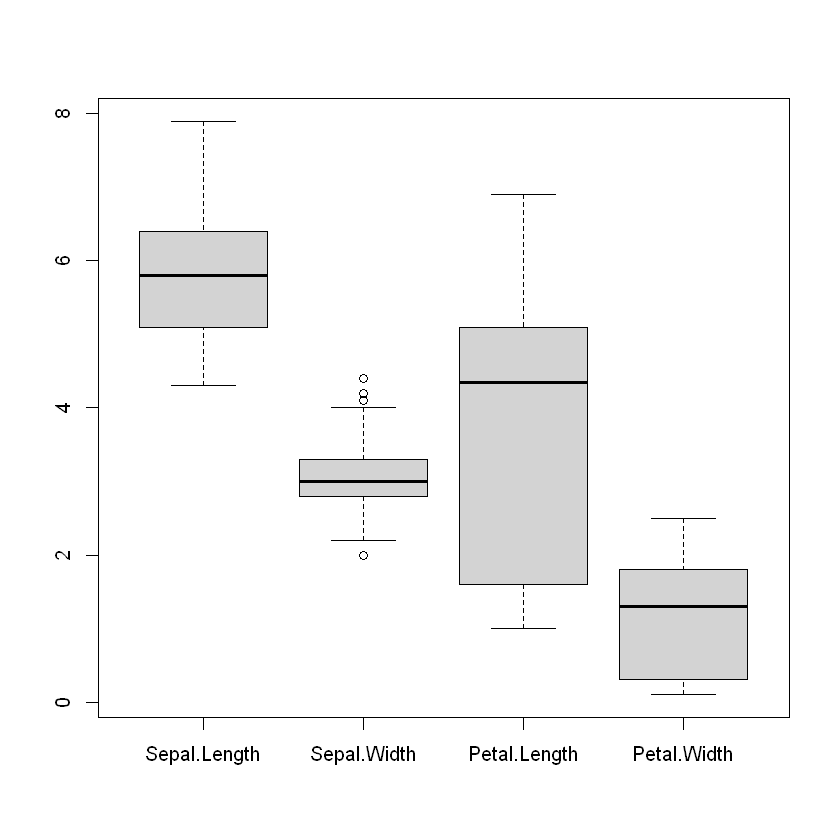

In [41]:
boxplot(iris[,-5])

More variance on length then Width

High variance on Petal.length ....

**Try to do the same with histogram ...**

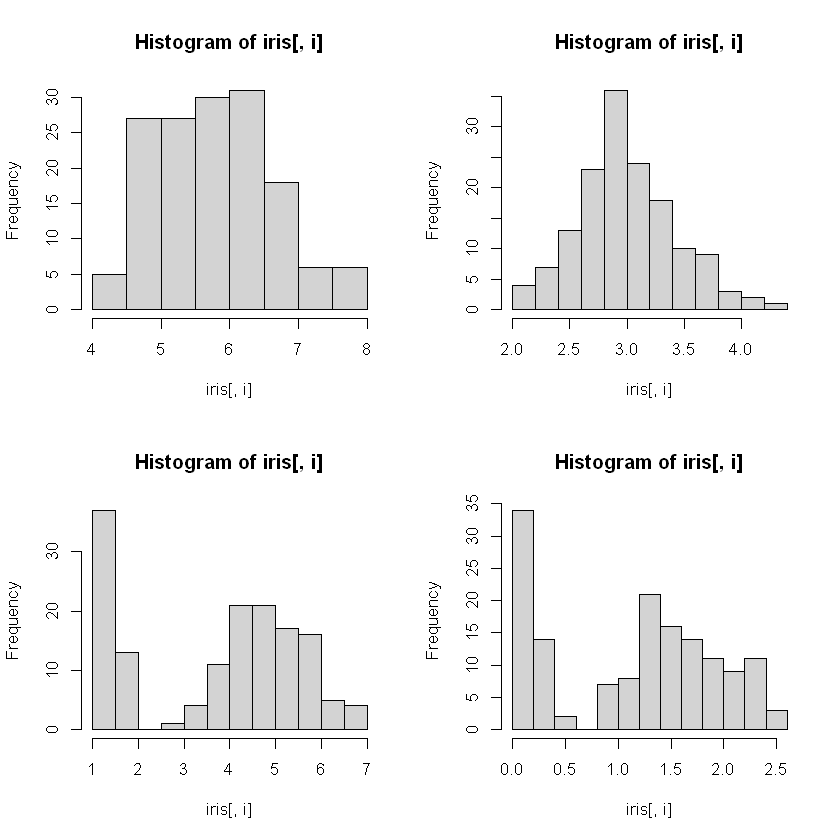

In [42]:
par(mfrow=c(2,2))
for (i in 1:4) hist(iris[,i])

** BUT difficult to read, and not the same bins, ....

## Pair plot

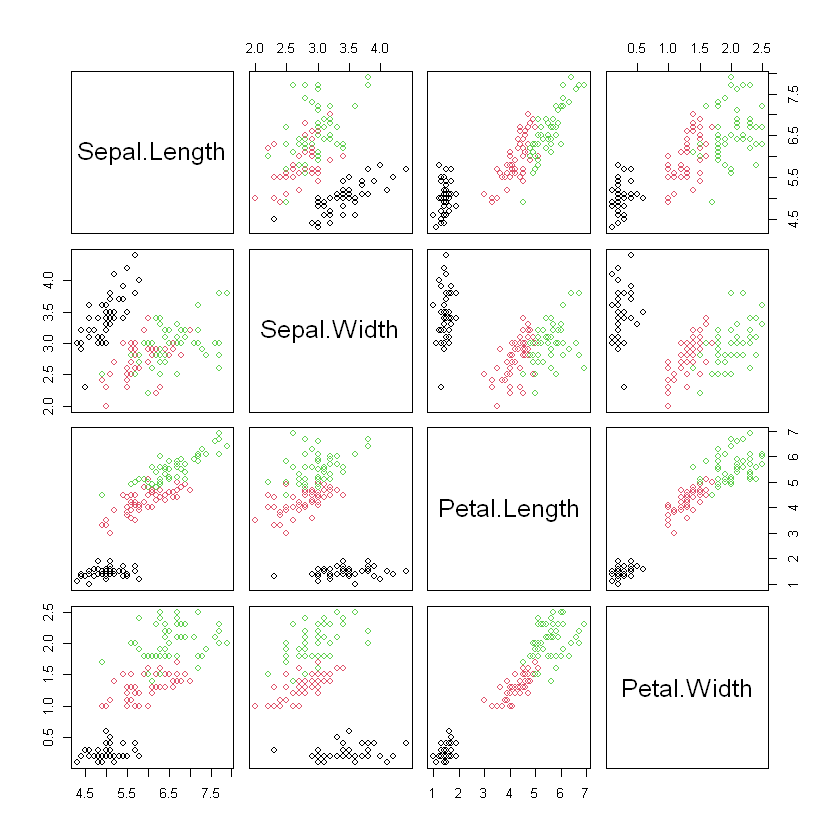

In [43]:
cls = as.numeric(iris$Species)
pairs(iris[,-5],col=cls)
#legend('top-left',legend = c("V","S","Vi"),col=1:3,pch=19)

**We can see groups, linear dependency**

## Multivariate numerical indicators

**Mean vector**
colMeans

In [44]:
colMeans(iris[,-5])

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

**covariance matrix**

In [45]:
var(iris[,-5])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


The covariance matrix can't be easely interpreted

**correlation matrix**

In [46]:
cor(iris[,-5])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


Correlation matrix is easier to interprete. Here :

* petal.width and petal.length are highly correlated
* petal.length and sepal.length also

# The Learning process - Importance to evaluate

## The Dataset to evaluate

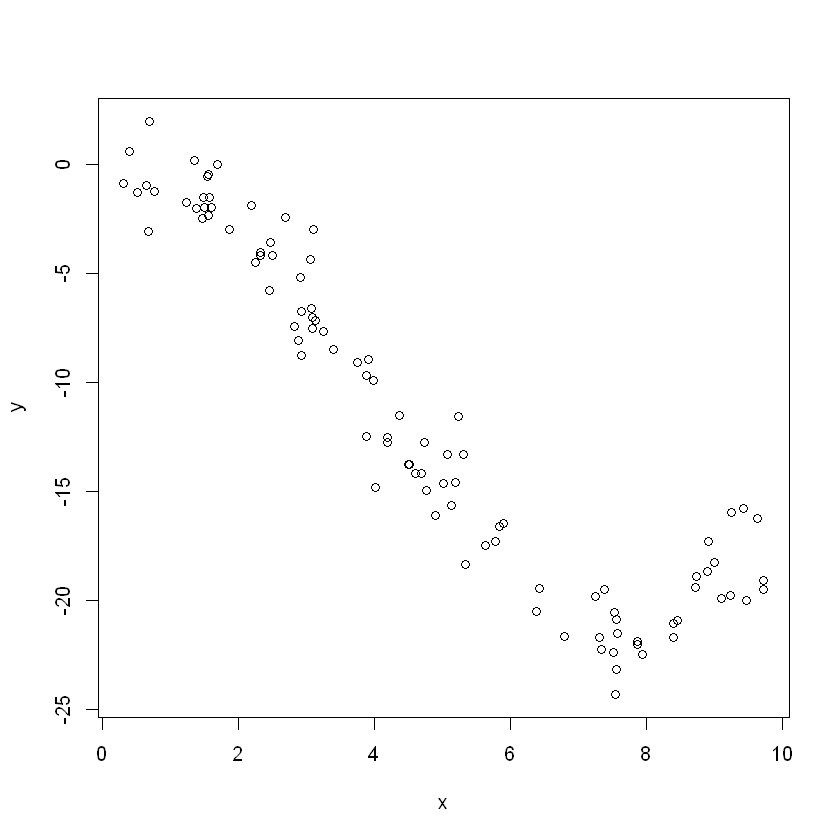

In [47]:
x = runif(100,0,10)
eps = rnorm(100,0,1.5)
y = 0.5 * x - 1.2 * x^2 + 0.1 * x^3 + eps
plot(x,y,type='p')

## Learning step

In [48]:
f=lm(y~x)

In [49]:
f


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.4451      -2.5425  


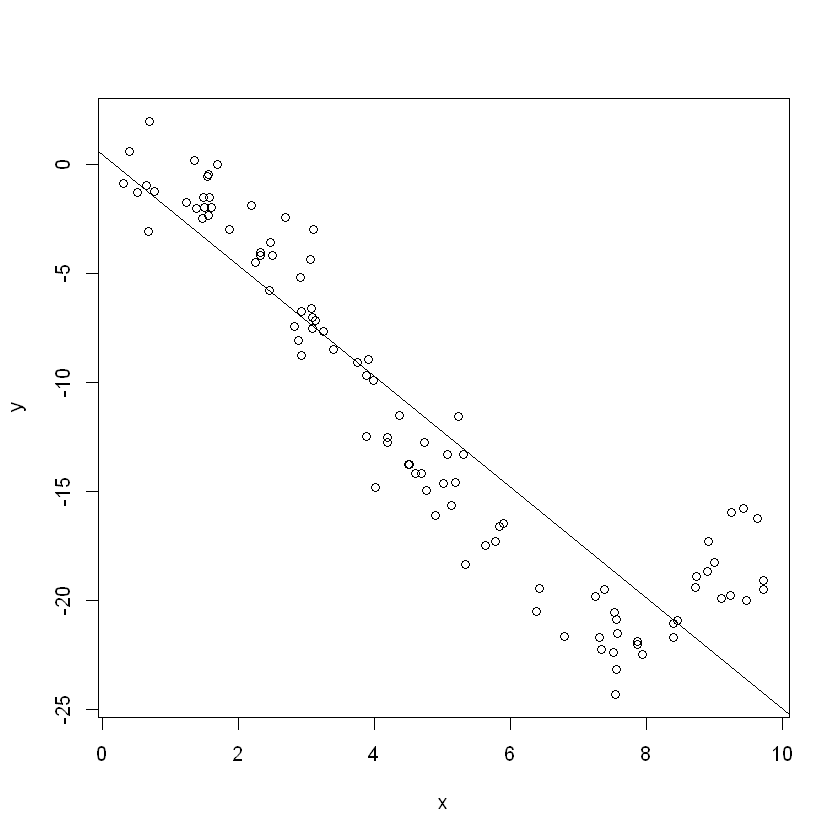

In [50]:
plot(x,y,type='p')
abline(f)

## Prediction step

In [51]:
yhat=predict(f,as.data.frame(x))

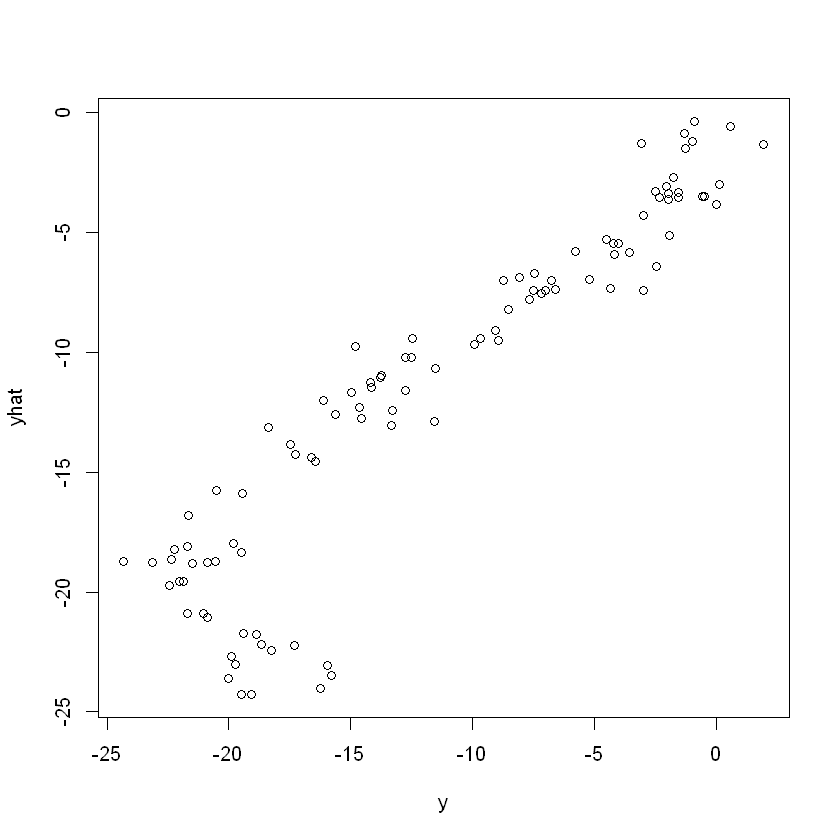

In [52]:
plot(y,yhat,type='p')

Fit is not perfect : it should be a y=x line

### Calculation of Learning Error Step

In [53]:
Errl= sum((y-yhat)^2)/length(yhat)
Errl

[1] 8.495499

**Not good BUT optimistic !

## The learning process - with "minimal setup"

### Learning step

In [54]:
train = sample(1:100,75)
f2=lm(y~x,subset = train)

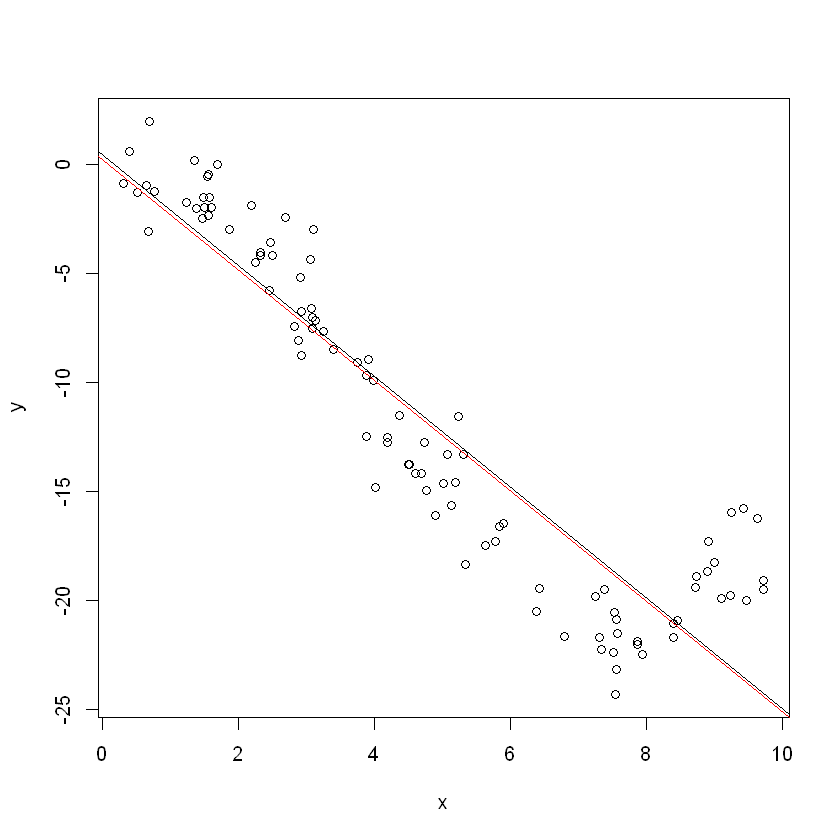

In [55]:
plot(x,y,type='p')
abline(f)
abline(f2,col='red')

### Evaluation Step

In [56]:
xval = data.frame(x = x[-train])
yhat2=predict(f2,newdata = xval)

### Error level Step

In [57]:
Errv = sum((y[-train]-yhat2)^2) / length(yhat2)
Errv

[1] 7.219235

**The error increases from 11 to 12

## Evaluation with a more complexe model - naive method

Let's try a complexe model (x^6)

[1] 2.124852

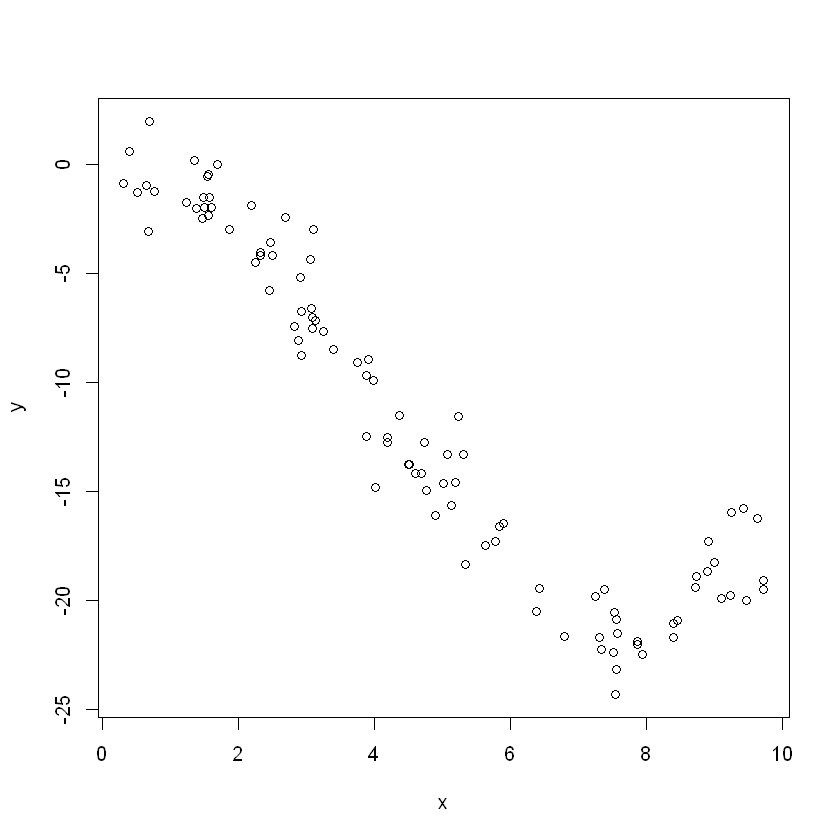

In [58]:
X=data.frame(x,x^2,x^3,x^4,x^5,x^6)
f3 =lm(y~., data = X)
plot(x,y,type='p')

yhat6=predict(f3,newdata=X)
Errl = sum((y-yhat6)^2)/length(yhat6)
Errl

Now the error is really lower on the learning set ... but still to optimistic

### with a the training set + evaluation

In [59]:
train = sample(1:100,75)
X=data.frame(x,x^2,x^3,x^4,x^5,x^6)
f4=lm(y~.,data = X, subset = train)
xval = X[-train,]
yhat2=predict(f4,newdata = xval)
Errl = sum((y[-train]-yhat2)^2)/length(yhat2)
Errl

[1] 2.966096

**This error is more realistic**

### searching the best model : increasing the number of variable x^i of the model

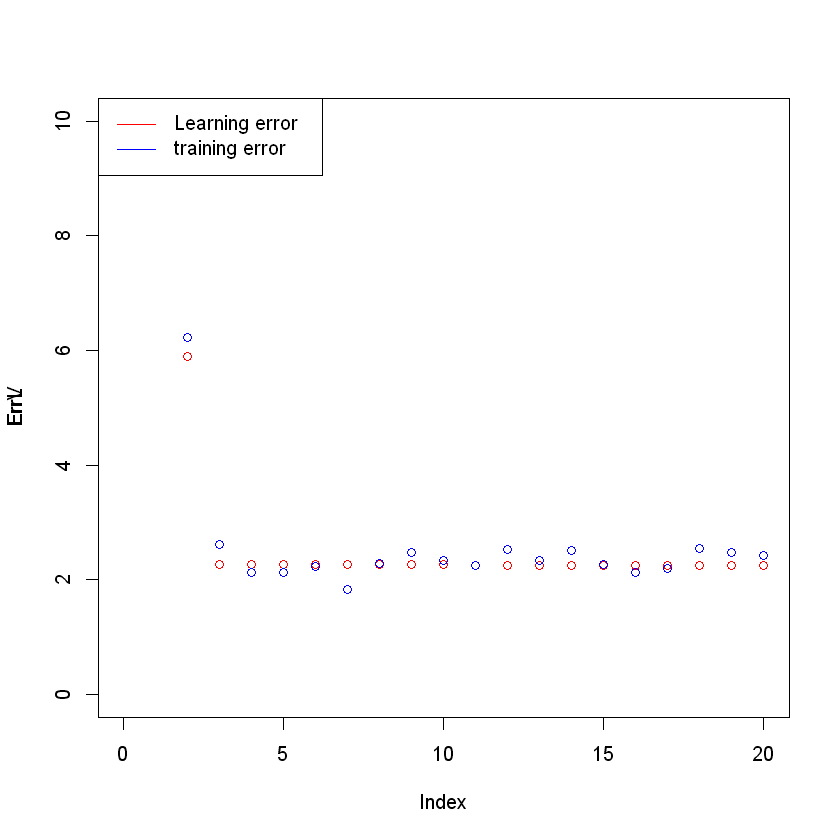

In [60]:
x = runif(1000,0,10)
eps = rnorm(1000,0,1.5)
y = 0.5 * x - 1.2 * x^2 + 0.1 * x^3 + eps

ErrL = ErrV = rep(NA,20)
X = data.frame(x)
for (c in 2:20){
    X=data.frame(X,x^c)
    f=lm(y~.,data = X)
    options(warn = -1)
    yhat = predict(f,newdata = X)
    ErrL[c] = sum((y-yhat)^2)/length(yhat)
                  
    train = sample(1:1000,750)
    f2=lm(y~.,data = X,subset = train)
    Xval = X[-train,]
    yhat = predict(f2,newdata = Xval)
    options(warn=0)
    ErrV[c] = sum((y[-train]-yhat)^2)/length(yhat)  
}
plot(ErrL,col='red',xlim=c(0,20),ylim=c(0,10))
par(new=TRUE)     
plot(ErrV,col='blue',xlim=c(0,20),ylim=c(0,10))
legend('topleft',legend = c("Learning error","training error"),col=c("red","blue"),lty=1)

In [61]:
which.min(ErrL)
which.min(ErrV)

[1] 20

[1] 7

### For Learning Error, the best model is with x^20 (in fact the model fit better and better when increasing the complexity
### For training Error, the best model is with x^6, which is more realistic

## Learning process - with "leave one out method"

In [62]:
X=data.frame(x,x^2,x^3,x^4,x^5,x^6)
Errv= c()
for (i in 1:nrow(X)) {
    # train model
    train = seq(1,nrow(X))[-i]
    f4=lm(y~.,data = X, subset = train)
    # predict
    xval = X[i,]
    yhat=predict(f4,newdata = xval)
    # caclulate error
    Errv[i] = sum((y[i]-yhat)^2)/length(yhat)
    }

[1] 2.300383

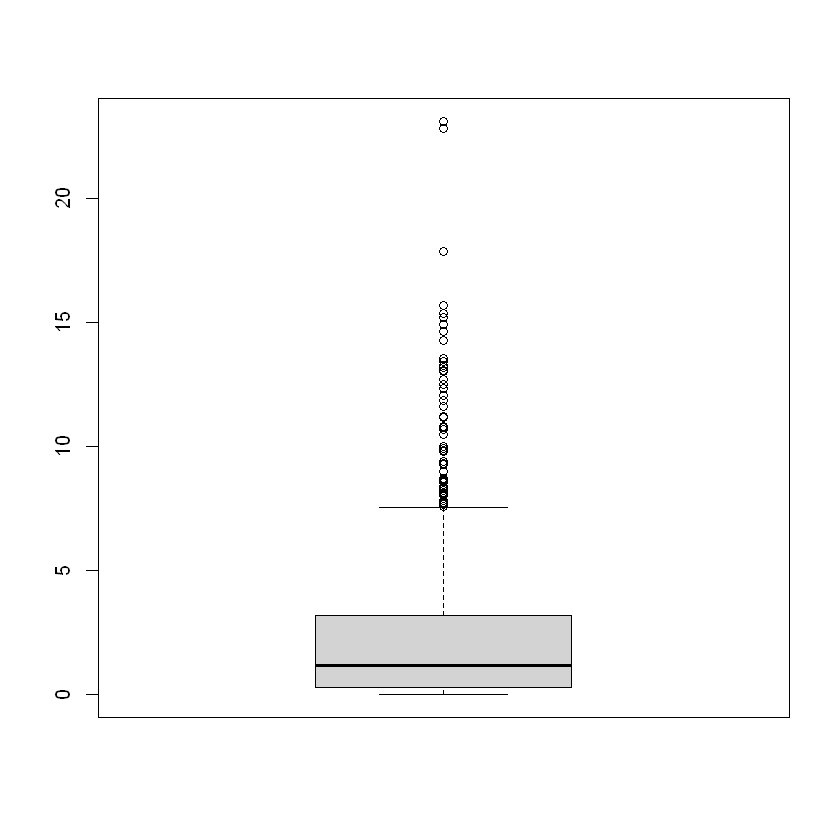

In [63]:
boxplot(Errv)
mean(Errv)

**The error found here : 2.31, can be relied on.

### Comparing errors between evaluation done on training, done by split method, done by leave one out method


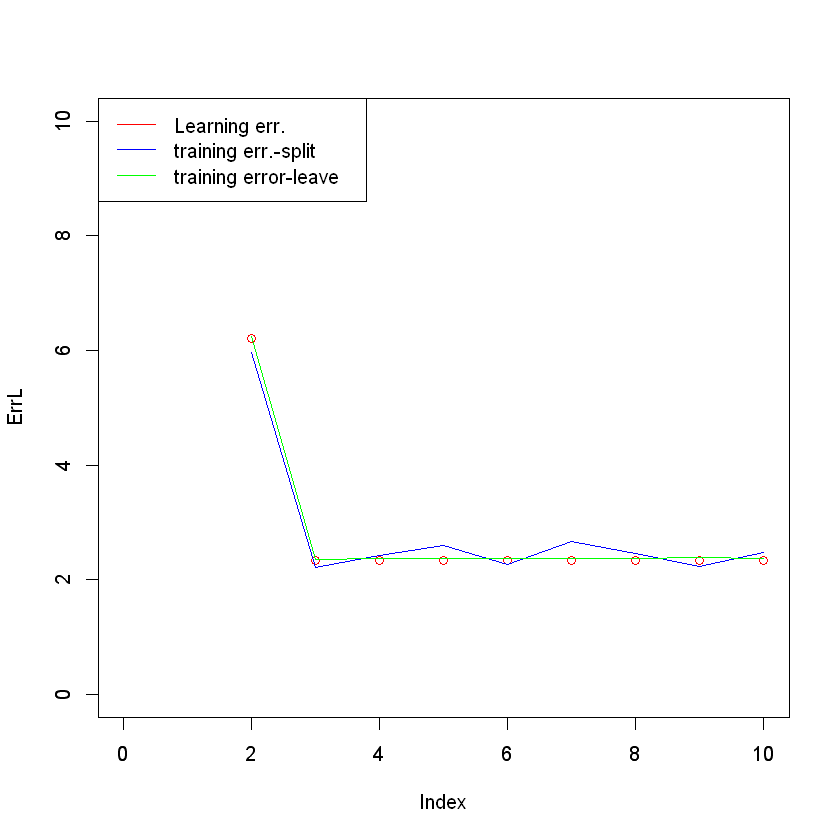

In [64]:
x = runif(1000,0,10)
eps = rnorm(1000,0,1.5)
y = 0.5 * x - 1.2 * x^2 + 0.1 * x^3 + eps

ErrL = ErrV = ErrCV = rep(NA,10)
X = data.frame(x)
for (c in 2:10){
    X=data.frame(X,x^c)
    f=lm(y~.,data = X)
    yhat = predict(f,newdata = X)
    ErrL[c] = sum((y-yhat)^2)/length(yhat)
                  
    train = sample(1:1000,750)
    f2=lm(y~.,data = X,subset = train)
    Xval = X[-train,]
    yhat = predict(f2,newdata = Xval)
    ErrV[c] = sum((y[-train]-yhat)^2)/length(yhat)  
    
    ErrCVall = c()
    for (i in 1:nrow(X)) {
        train = seq(1,nrow(X))[-i]
        f4=lm(y~.,data = X, subset = train)
        xval = X[i,]
        yhat=predict(f4,newdata = xval)
        ErrCVall[i] = sum((y[i]-yhat)^2)/length(yhat)
    }
    ErrCV[c]= mean(ErrCVall)
   
}
plot(ErrL,type = 'p',col='red',xlim=c(0,10),ylim=c(0,10))
par(new=TRUE)     
plot(ErrV,type='l',col='blue',xlim=c(0,10),ylim=c(0,10),xlab="",ylab="")
par(new=TRUE)     
plot(ErrCV,type='l',col='green',xlim=c(0,10),ylim=c(0,10),xlab="",ylab="")
legend('topleft',legend = c("Learning err.","training err.-split","training error-leave"),col=c("red","blue","green"),lty=1)                  
